## Statistical Analysis for TSB-AD

### TSB-AD-U

In [ ]:
import pandas as pd
df_VUS_PR = pd.read_csv('benchmark_eval_results/uni_mergedTable_VUS-PR.csv')
Comparaed_Solution_Pool = ['Sub-IForest', 'IForest', 'Sub-LOF', 'LOF', 'POLY', 'MatrixProfile', 'KShapeAD', 'SAND', 'Series2Graph', 'SR', 'Sub-PCA', 'Sub-HBOS', 'Sub-OCSVM', 
            'Sub-MCD', 'Sub-KNN', 'KMeansAD', 'AutoEncoder', 'CNN', 'LSTMAD', 'TranAD', 'AnomalyTransformer', 'OmniAnomaly', 'USAD', 'Donut', 
            'TimesNet', 'FITS', 'OFA', 'Lag-Llama', 'Chronos', 'TimesFM', 'MOMENT (ZS)', 'MOMENT (FT)']

mean_df = pd.DataFrame()
mean_df['VUS_PR_Rank'] = df_VUS_PR[Comparaed_Solution_Pool].mean().rank(ascending=False)
sorted_mean_df = mean_df.sort_values(by='VUS_PR_Rank', ascending=True)
sorted_mean_df

,VUS_PR_Rank
Sub-PCA,1.0
KShapeAD,2.0
POLY,3.0
Series2Graph,4.0
MOMENT (FT),5.0
MOMENT (ZS),6.0
KMeansAD,7.0
USAD,8.0
Sub-KNN,9.0
MatrixProfile,10.0


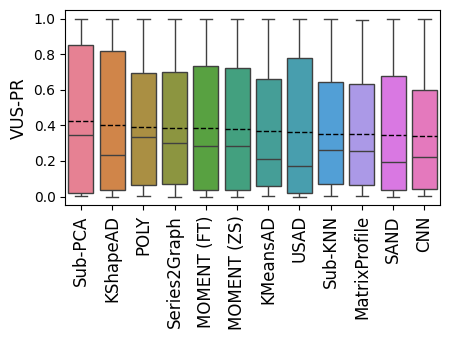

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rank_list = sorted_mean_df.index[:12]

df_acc = df_VUS_PR
plt.figure(figsize=(4.6, 3.5))
sns.reset_orig()
ax = sns.boxplot(data=df_acc[rank_list], showfliers=False, 
                 meanprops=dict(color='k', linestyle='--'), showmeans=True, meanline=True)
plt.xticks(ticks=range(len(rank_list)), labels=rank_list, rotation=90, fontsize=12)
plt.ylabel('VUS-PR', fontsize=12)
plt.tight_layout()
plt.show()

### TSB-AD-M

In [9]:
import pandas as pd
df_VUS_PR = pd.read_csv('benchmark_eval_results/multi_mergedTable_VUS-PR.csv')
Comparaed_Solution_Pool = ['IForest', 'LOF', 'PCA', 'HBOS', 'OCSVM', 'MCD', 'KNN', 'KMeansAD', 'COPOD', 'CBLOF', 'EIF', 'RobustPCA', 'AutoEncoder', 
                    'CNN', 'LSTMAD', 'TranAD', 'AnomalyTransformer', 'OmniAnomaly', 'USAD', 'Donut', 'TimesNet', 'FITS', 'OFA']

mean_df = pd.DataFrame()
mean_df['VUS_PR_Rank'] = df_VUS_PR[Comparaed_Solution_Pool].mean().rank(ascending=False)
sorted_mean_df = mean_df.sort_values(by='VUS_PR_Rank', ascending=True)
sorted_mean_df

,VUS_PR_Rank
CNN,1.0
OmniAnomaly,2.0
PCA,3.0
LSTMAD,4.0
USAD,5.0
AutoEncoder,6.0
KMeansAD,7.0
CBLOF,8.0
MCD,9.0
OCSVM,10.0


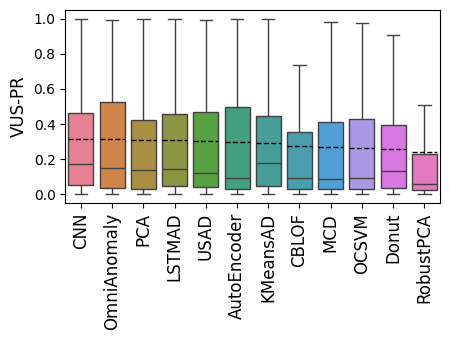

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

rank_list = sorted_mean_df.index[:12]

df_acc = df_VUS_PR
plt.figure(figsize=(4.6, 3.5))
sns.reset_orig()
ax = sns.boxplot(data=df_acc[rank_list], showfliers=False, 
                 meanprops=dict(color='k', linestyle='--'), showmeans=True, meanline=True)
plt.xticks(ticks=range(len(rank_list)), labels=rank_list, rotation=90, fontsize=12)
plt.ylabel('VUS-PR', fontsize=12)
plt.tight_layout()
plt.show()

### CD Diagram

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import operator
import math
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman
import networkx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
import seaborn as sns

def Friedman_Nemenyi(alpha=0.05, df_perf=None):
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['classifier_name']).size()}).reset_index()
    # Record the maximum number of datasets
    max_nb_datasets = df_counts['count'].max()
    # Create a list of classifiers
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['classifier_name'])

    # print('classifiers: ', classifiers)

    '''
    Expected input format for friedmanchisquare is:
                Dataset1        Dataset2        Dataset3        Dataset4        Dataset5
    classifer1
    classifer2
    classifer3 
    '''

    # Compute friedman p-value
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['classifier_name'] == c]['accuracy'])
        for c in classifiers))[1]

    # Decide whether to reject the null hypothesis
    # If p-value >= alpha: we cannot reject the null hypothesis. No statistical difference.
    if friedman_p_value >= alpha:
        print('No statistical difference...')
        return None,None,None
    # Friedman test OK
    # Prepare input for Nemenyi test
    data = []
    for c in classifiers:
        data.append(df_perf.loc[df_perf['classifier_name'] == c]['accuracy'])
    data = np.array(data, dtype=np.float64)
    # Conduct the Nemenyi post-hoc test
    # print(classifiers)
    # Order is classifiers' order
    nemenyi = posthoc_nemenyi_friedman(data.T)

    # print(nemenyi)
    
    # Original code: p_values.append((classifier_1, classifier_2, p_value, False)), True: represents there exists statistical difference
    p_values = []

    # Comparing p-values with the alpha value
    for nemenyi_indx in nemenyi.index:
        for nemenyi_columns in nemenyi.columns:
            if nemenyi_indx < nemenyi_columns:
                if nemenyi.loc[nemenyi_indx, nemenyi_columns] < alpha:
                    p_values.append((classifiers[nemenyi_indx], classifiers[nemenyi_columns], nemenyi.loc[nemenyi_indx, nemenyi_columns], True))
                else:
                    p_values.append((classifiers[nemenyi_indx], classifiers[nemenyi_columns], nemenyi.loc[nemenyi_indx, nemenyi_columns], False))
            else: continue

    # Nemenyi test OK

    m = len(classifiers)

    # Sort by classifier name then by dataset name
    sorted_df_perf = df_perf.loc[df_perf['classifier_name'].isin(classifiers)]. \
        sort_values(['classifier_name', 'dataset_name'])

    rank_data = np.array(sorted_df_perf['accuracy']).reshape(m, max_nb_datasets)

    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=np.unique(sorted_df_perf['dataset_name']))

    dfff = df_ranks.rank(ascending=False)
    # compute average rank
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    
    return p_values, average_ranks, max_nb_datasets

def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=200, textspace=1, reverse=False, filename=None, **kwargs):
    
    width = width
    textspace = float(textspace)
    '''l is an array of array 
        [[......]
         [......]
         [......]]; 
    n is an integer'''
    # n th column
    def nth(l, n):
        n = lloc(l, n)
        # Return n th column
        return [a[n] for a in l]
    
    '''l is an array of array 
        [[......]
         [......]
         [......]]; 
    n is an integer'''
    # return an integer, count from front or from back.
    def lloc(l, n):
        if n < 0:
            return len(l[0]) + n
        else:
            return n
    # lr is an array of integers
    # Maximum range start from all zeros. Returns an iterable element of tuple.
    def mxrange(lr):
        # If nothing in the array
        if not len(lr):
            yield ()
        else:
            index = lr[0]
            # Check whether index is an integer.
            if isinstance(index, int):
                index = [index]
            # *index: index must be an iterable []
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    # Form a tuple, and generate an iterable value
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums
    # lowv: low value
    if lowv is None:
        '''int(math.floor(min(ssums))): select the minimum value in ssums and take floor.
           Then compare with 1 to see which one is the minimum.'''
        lowv = min(1, int(math.floor(min(ssums))))
    # highv: high value
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4
    # how many algorithms
    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace
    
    # Position of rank
    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        # Set up the format
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # set up the formats
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant + 2

    # matplotlib figure format setup
    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()

    hf = 1. / height
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    # Line plots
    def line(l, color='k', **kwargs):
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    # Add text to the plot
    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=0.7)

    bigtick = 0.1
    smalltick = 0.05
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None

    # [lowv, highv], step size is 0.5
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        # If a is an integer
        if a == int(a):
            tick = bigtick
        # Plot a line
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=0.7)

    # Add text to the plot, only for integer value
    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    # Format for the first half of algorithms
    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)

        color = 'k'
        text(textspace - 0.2, chei, filter_names(nnames[i]), color=color, ha="right", va="center", size=16)
        # text(textspace - 0.2, chei, filter_names(name_mapping[nnames[i]] if nnames[i] in name_mapping.keys() else nnames[i]), color=color, ha="right", va="center", size=16)


    # Format for the second half of algorithms
    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)

        color = 'k'
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]), color=color, ha="left", va="center", size=16)
        # text(textspace + scalewidth + 0.2, chei, filter_names(name_mapping[nnames[i]] if nnames[i] in name_mapping.keys() else nnames[i]), color=color, ha="left", va="center", size=16)
        

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            
    start = cline + 0.2
    side = -0.02
    height = 0.1


    #Generate cliques and plot a line to connect elements in cliques    
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    # Plot a line to connect elements in cliques
    for clq in cliques:
        if len(clq) == 1:
            continue
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        # Test
        # print("ssums[min_idx]: {}; ssums[max_idx]: {}".format(ssums[min_idx], ssums[max_idx]))
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height

def form_cliques(p_values, nnames):
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1
    g = networkx.Graph(g_data)

    #Test
    # print("p_values in form_cliques:\n{}".format(p_values))
    # print("g_data:\n{}".format(g_data))

    # Returns all maximal cliques in an undirected graph.
    return networkx.find_cliques(g)

ranking: ['SR', 'CNN', 'IForest', 'LSTMAD', 'POLY', 'MOMENT (FT)', 'MOMENT (ZS)', 'Series2Graph', 'Sub-PCA', 'USAD']


/tmp/ipykernel_1270497/1644961721.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


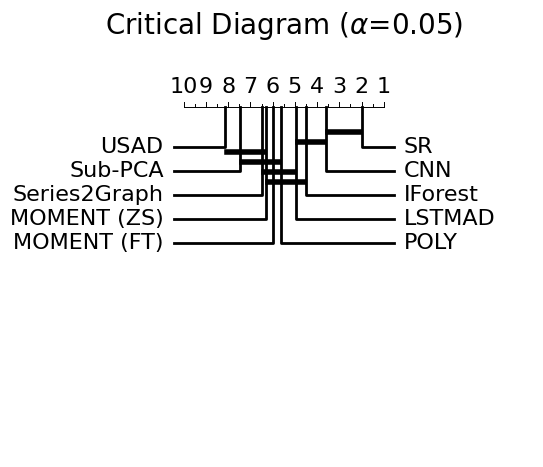

In [3]:
df_acc = pd.read_csv('benchmark_eval_results/uni_mergedTable_VUS-PR.csv')
Comparaed_Solution_Pool = ['Sub-PCA', 'MOMENT (FT)', 'MOMENT (ZS)', 'POLY', 'CNN', 'SR', 'Series2Graph', 'LSTMAD', 'IForest', 'USAD']

df_filter = df_acc[df_acc['point_anomaly'] == 1]
# df_filter = df_acc[df_acc['seq_anomaly'] == 1]
# df_filter = df_acc[df_acc['num_anomaly'] == 1]
# df_filter = df_acc[df_acc['num_anomaly'] > 1]

eval_list = []
for index, row in df_filter.iterrows():
    for method in Comparaed_Solution_Pool:
        eval_list.append([method, row['file'], row[method]])
eval_df = pd.DataFrame(eval_list, columns=['classifier_name', 'dataset_name', 'accuracy'])
p_values, average_ranks, _ = Friedman_Nemenyi(df_perf=eval_df, alpha=0.05)
ranking = average_ranks.keys().to_list()[::-1]

graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
            cd=None, reverse=True, width=5, textspace=1.5)
print('ranking:', ranking[:10])
plt.title("Critical Diagram ({}=0.05)".format(r'$\alpha$'),fontsize=20)
plt.tight_layout()
plt.show()